# The very first Virtual Rat RNN

In [25]:
import numpy as np
import matplotlib.pyplot as plt

from RNN import FirstRNN
from VirtualRatFunctions import *
from RNN_solver import RNNsolver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

allRatsData = getData(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Loaded defaults from ~/.dbconf
Z009 (12771, 6)


In [26]:
rat = allRatsData["Z009"]

x = np.zeros((1, rat.shape[0], 3))
y = np.zeros((1, rat.shape[0]))
trueY = np.zeros((1, rat.shape[0]))

x[0,:,:] = rat[:,:3]

train_num = int(rat.shape[0] * 0.8)
val_num = int(rat.shape[0] * 0.9)

trainX = x[:,:train_num,:]
valX = x[:,train_num:val_num,:]
testX = x[:,val_num:,:]

y[0,rat[:,3]>0] = 0
y[0,rat[:,4]>0] = 1
y[0,rat[:,5]>0] = 2

trainY = y[:,:train_num]
valY = y[:,train_num:val_num]
testY = y[:,val_num:]

trueY[0,:] = np.logical_not(np.bitwise_xor(rat[:,0],rat[:,1]))
trainTrueY = trueY[:,:train_num]
valTrueY = trueY[:,train_num:val_num]
testTrueY = trueY[:,val_num:]

In [27]:
print trainX.shape
print trainY.shape
print trainTrueY.shape

(1, 10216, 3)
(1, 10216)
(1, 10216)


In [28]:
RNN = FirstRNN(hidden_dim = 5)
solver = RNNsolver(RNN, trainX, trainY,optim_config={
                 'learning_rate': 1e-4,
               }, num_epochs = 500,
                   verbose = True)
solver.train()
choice, probs = RNN.predict(valX)
acc = np.mean(choice == valTrueY)
print acc


(Iteration 1 / 500) loss: 11585.272464
(Iteration 11 / 500) loss: 10917.520294
(Iteration 21 / 500) loss: 10694.526038
(Iteration 31 / 500) loss: 10447.577304
(Iteration 41 / 500) loss: 10183.022452
(Iteration 51 / 500) loss: 9888.737544
(Iteration 61 / 500) loss: 9654.211461
(Iteration 71 / 500) loss: 9523.692076
(Iteration 81 / 500) loss: 9461.033216
(Iteration 91 / 500) loss: 9431.682286
(Iteration 101 / 500) loss: 9417.365360
(Iteration 111 / 500) loss: 9409.711456
(Iteration 121 / 500) loss: 9405.032629
(Iteration 131 / 500) loss: 9401.713967
(Iteration 141 / 500) loss: 9399.047010
(Iteration 151 / 500) loss: 9396.722741
(Iteration 161 / 500) loss: 9394.610101
(Iteration 171 / 500) loss: 9392.656310
(Iteration 181 / 500) loss: 9390.840659
(Iteration 191 / 500) loss: 9389.153659
(Iteration 201 / 500) loss: 9387.588865
(Iteration 211 / 500) loss: 9386.140514
(Iteration 221 / 500) loss: 9384.803171
(Iteration 231 / 500) loss: 9383.571537
(Iteration 241 / 500) loss: 9382.439900
(Itera

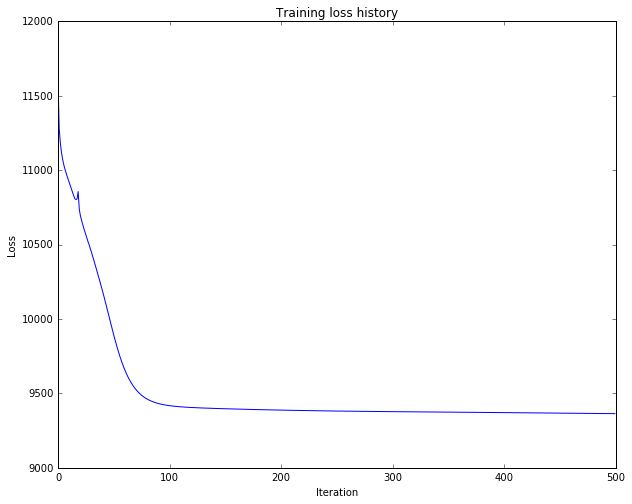

In [30]:
# Plot the training losses
plt.plot(solver.loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training loss history')
plt.show()

In [54]:
probs[:,:10,:] #left, right, cpv

array([[[ 0.45937354,  0.2270144 ,  0.31361206],
        [ 0.53525942,  0.09592337,  0.36881721],
        [ 0.08792081,  0.49400552,  0.41807367],
        [ 0.48842023,  0.13397988,  0.37759989],
        [ 0.50082922,  0.09726768,  0.4019031 ],
        [ 0.08393924,  0.50298037,  0.41308039],
        [ 0.48744941,  0.134522  ,  0.37802858],
        [ 0.50068604,  0.09732306,  0.4019909 ],
        [ 0.08393791,  0.50300276,  0.41305933],
        [ 0.48744739,  0.13452027,  0.37803234]]])

In [59]:
normalized_probs = np.zeros((probs.shape[0],probs.shape[1],probs.shape[2]-1))
normalized_probs[:,:,0] = probs[:,:,0]/(probs[:,:,0] + probs[:,:,1])
normalized_probs[:,:,1] = probs[:,:,1]/(probs[:,:,0] + probs[:,:,1])
hit_rate = np.zeros(probs.shape[1])
right = valTrueY[0,:] == 1
left = valTrueY[0,:] == 0
hit_rate[left] = normalized_probs[0,left,0]
hit_rate[right] = normalized_probs[0,right,1] 

In [87]:
switches = []
pro_rule = 0
for i in xrange(valX.shape[1]):
    if valX[0,i,0] != pro_rule:
        switches.append(i)
        pro_rule = valX[0,i,0]
pro_rules = valX[0,:,0]
pro_prob = np.empty(probs.shape[1])
anti_prob = np.empty(probs.shape[1])
pro_prob[:] = np.NAN
anti_prob[:] = np.NAN
pro_rules = pro_rules.astype(bool)
pro_prob = hit_rate[pro_rules]
anti_prob = hit_rate[np.logical_not(pro_rules)]

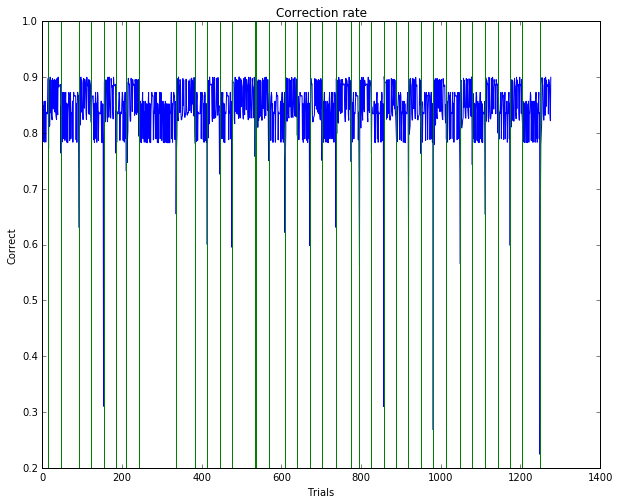

In [95]:
T = len(hit_rate)
plt.plot(range(T), hit_rate,color='b')

for i in xrange(len(switches)):
    plt.axvline(x=switches[i], ymin=0, ymax = 1, linewidth=1, color='g')
    
plt.xlabel('Trials')
plt.ylabel('Correct')
plt.title('Correction rate')
plt.show()

In [98]:
for k in RNN.params.keys():
    print k,RNN.params[k]

b [-0.57399046 -0.4043636   0.27713463  0.49530268 -0.47808248]
b_vocab [ 0.61053056 -0.71196127  0.10143089]
h0 [[ 0.00627142 -0.00110094  0.00073081  0.00236279  0.00149439]]
W_vocab [[ 1.64592993 -0.69519198  0.26689249]
 [ 0.11821652  0.3223567   0.55414885]
 [ 0.03130261  0.60196143 -0.35947996]
 [ 0.82315272 -0.21170416  0.57565111]
 [ 1.31447017 -1.49646246 -0.22108307]]
Wh [[ 0.00339802 -0.19890399 -0.40019637  0.45099115 -0.51479059]
 [ 0.25485617  0.17271873  0.40619385 -0.92357361  0.52343309]
 [-0.09936055  0.39384839 -0.37835124  0.30662769 -0.1343925 ]
 [-0.27574641 -0.84603965 -0.32485515  0.69515032 -0.86458158]
 [ 0.06846359  0.29238799  0.11702012 -0.17983127  0.17374927]]
Wx [[-1.87049866 -0.24745275 -0.06917471 -0.3710781   1.60905099]
 [ 1.83318925 -0.58023125 -0.50530213 -0.62609708 -1.90910864]
 [ 0.53789884 -0.06928987 -0.54814583  0.20211616 -0.25247484]]
